In [20]:
import os
import numpy as np
from skimage import io, transform, feature, color
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier




Forma da imagem 1: (175, 233, 3)
Forma da imagem 2: (260, 390, 3)
Forma da imagem 3: (163, 199, 3)
Forma da imagem 4: (164, 168, 3)
Forma da imagem 5: (169, 225, 3)


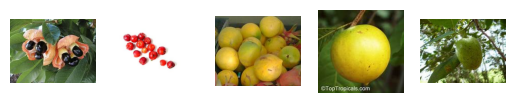

In [21]:
diretorio_imagens = 'Imagens'
num_imagens = 5

descritores_hog = [] 
rotulos = []  

for contador, arquivo in enumerate(os.listdir(diretorio_imagens)):
    if contador >= num_imagens:
        break

    caminho_imagem = os.path.join(diretorio_imagens, arquivo)
    img = io.imread(caminho_imagem)

    plt.subplot(1, num_imagens, contador+1)
    plt.axis("off")
    plt.imshow(img)

    print(f"Forma da imagem {contador+1}: {img.shape}")

plt.show()

Forma da imagem 1: (512, 256, 3)
Forma da imagem 2: (512, 256, 3)
Forma da imagem 3: (512, 256, 3)
Forma da imagem 4: (512, 256, 3)
Forma da imagem 5: (512, 256, 3)


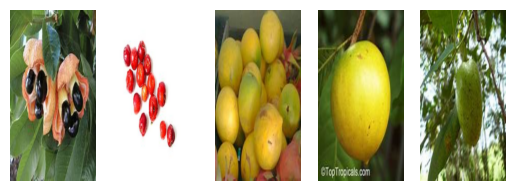

In [22]:
for contador, arquivo in enumerate(os.listdir(diretorio_imagens)):
    if contador >= num_imagens:
        break

    caminho_imagem = os.path.join(diretorio_imagens, arquivo)
    img = io.imread(caminho_imagem)

    resized_img = transform.resize(img, (128*4, 64*4))

    plt.subplot(1, num_imagens, contador+1)
    plt.axis("off")
    plt.imshow(resized_img)

    print(f"Forma da imagem {contador+1}: {resized_img.shape}")

plt.show()

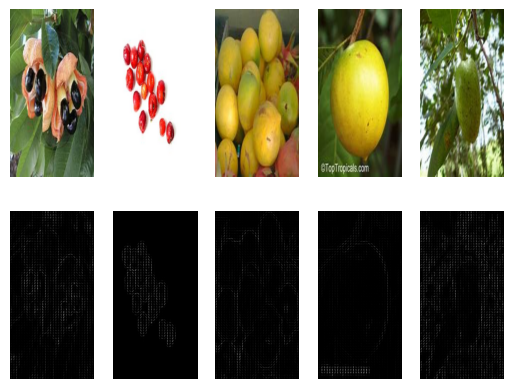

In [23]:
for contador, arquivo in enumerate(os.listdir(diretorio_imagens)):
    if contador >= num_imagens:
        break

    caminho_imagem = os.path.join(diretorio_imagens, arquivo)
    img = io.imread(caminho_imagem)

    resized_img = transform.resize(img, (128*4, 64*4))
    gray_img = color.rgb2gray(resized_img)

    fd, hog_image = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                                cells_per_block=(2, 2), visualize=True)

    plt.subplot(2, num_imagens, contador+1)
    plt.axis("off")
    plt.imshow(resized_img)

    plt.subplot(2, num_imagens, contador+num_imagens+1)
    plt.axis("off")
    plt.imshow(hog_image, cmap="gray")

    descritores_hog.append(fd)



    rotulo = contador  
    rotulos.append(rotulo) 

   

plt.show()


In [25]:
#aumentei a quantidade de dados pra melhor a acuracia, aumentou porem precisaria de meuito mais dados para ter resultados bons, porém, não consegui com poucos dados.
#fonte: https://towardsdatascience.com/hog-histogram-of-oriented-gradients-67ecd887675f#:~:text=The%20HOG%20descriptor%20focuses%20on,and%20orientations%20of%20the%20gradient.

descritores_hog = np.array(descritores_hog)
rotulos = np.array(rotulos)

X_treino, X_teste, y_treino, y_teste = train_test_split(descritores_hog, rotulos, test_size=0.2, random_state=30)

clf = RandomForestClassifier()
clf.fit(X_treino, y_treino)

previsoes = clf.predict(X_teste)

acuracia = accuracy_score(y_teste, previsoes)
precisao = precision_score(y_teste, previsoes, average='weighted')

print('Acurácia:', acuracia)
print('Precisão:', precisao)

Acurácia: 0.0
Precisão: 0.0


c:\Users\guilh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
